# 绘制训练过程log变化线

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
raw_animal_noisy_label = pd.read_csv('log/raw_animal_noisy_label.csv')
ITLM_animal_noisy_label = pd.read_csv('log/ITLM_animal_noisy_label.csv')    
raw_noisy_label = pd.read_csv('log/raw_noisy_label.csv')
ITLM_noisy_label_hp = pd.read_csv('log/ITLM_noisy_label_hp.csv')
ITLM_noisy_label_lp = pd.read_csv('log/ITLM_noisy_label_lp.csv')

resnet34_animal_raw_finetuning_all = pd.read_csv('log/resnet34_animal_raw_finetuning_all.csv')
resnet34_animal_raw_finetuning_fc = pd.read_csv('log/resnet34_animal_raw_finetuning_0.1fc.csv')

# ITLM_random_label1 = pd.read_csv('log/ITLM_random_label1.csv') 
# ITLM_random_label2 = pd.read_csv('log/ITLM_random_label2.csv')
# ITLM_random_label3 = pd.read_csv('log/ITLM_random_label3.csv')       
# ITLM_worse_label = pd.read_csv('log/ITLM_worse_label.csv') 

# raw_aggre_label = pd.read_csv('log/raw_aggre_label.csv')
# raw_clean_label = pd.read_csv('log/raw_clean_label.csv')       
# raw_random_label1 = pd.read_csv('log/raw_random_label1.csv') 
# raw_random_label2 = pd.read_csv('log/raw_random_label2.csv')
# raw_random_label3 = pd.read_csv('log/raw_random_label3.csv')       
# raw_worse_label = pd.read_csv('log/raw_worse_label.csv') 

In [16]:
def plot_log_pic(train_log):
    plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(train_log['Train Loss'] ,"r",label = 'Train Loss')
    plt.title('Train Loss')
    plt.xlabel('Epoch')

    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(train_log['Train Accuracy'],"g",label = 'Train Accuracy')
    plt.title('Train Accuracy')
    plt.xlabel('Epoch')

    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(train_log['Test Loss'],"b",label = 'Test Loss')
    plt.title('Test Loss')
    plt.xlabel('Epoch')

    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(train_log['Test Accuracy'],"y",label = 'Test Accuracy')
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show
    
def comp_plot_log_pic(train_log1, train_log2, title, l1 = 'raw', l2 = 'ITLM'):
    plt.figure()
    fig = plt.gcf()  # 获取当前图形对象

    # 设置整体标题
    fig.suptitle(title, fontsize=16, fontweight='bold')  # 可以在这里自定义标题样式

    plt.subplot(1, 2, 1)
    plt.plot(train_log1['Train Accuracy'], "r", label=f'{l1} Train Accuracy')
    plt.plot(train_log2['Train Accuracy'], "g", label=f'{l2} Train Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.title('Train Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(train_log1['Test Accuracy'], "r", label=f'{l1} Test Accuracy')
    plt.plot(train_log2['Test Accuracy'], "g", label=f'{l2} Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.title('Test Accuracy')
    
    plt.tight_layout()  # 调整子图布局

    plt.show()

    Epoch  Train Loss  Train Accuracy  Test Loss  Test Accuracy
0       1    2.619658          16.172   8.095592           8.68
1       2    2.185664          20.498  21.950416          13.86
2       3    2.046823          26.222  13.125534          14.90
3       4    1.914996          30.618   8.670709          26.16
4       5    1.817066          34.350   7.739257          25.26
..    ...         ...             ...        ...            ...
95     96    1.013600          64.082   1.098799          70.12
96     97    1.013751          63.856   0.986059          73.02
97     98    1.015227          63.904   1.006406          72.86
98     99    1.012339          64.080   1.046555          71.18
99    100    1.005632          64.276   1.062006          70.86

[100 rows x 5 columns]


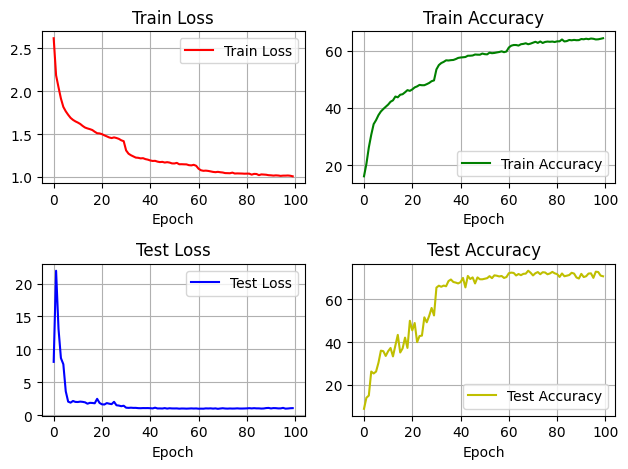

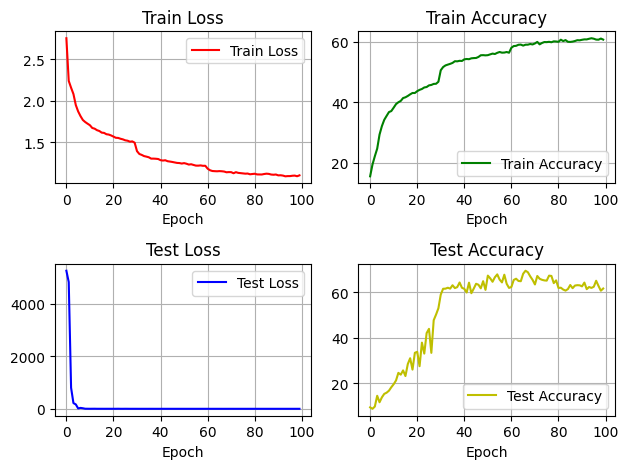

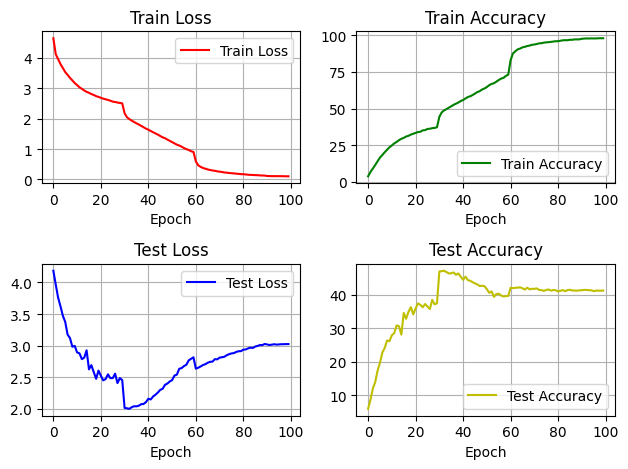

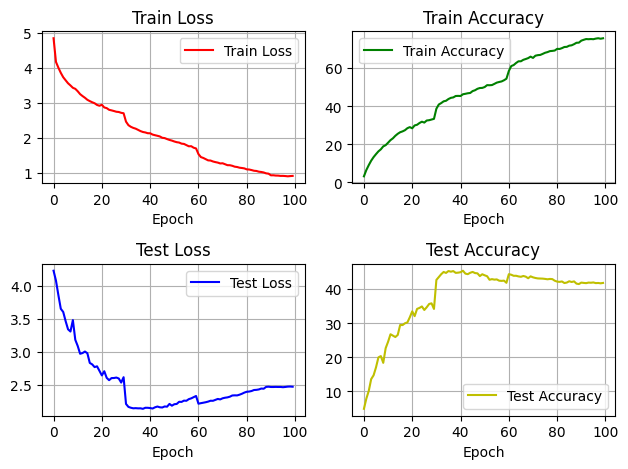

In [17]:
plot_log_pic(raw_animal_noisy_label)
print(raw_animal_noisy_label)
plot_log_pic(ITLM_animal_noisy_label)
plot_log_pic(raw_noisy_label)
plot_log_pic(ITLM_noisy_label)

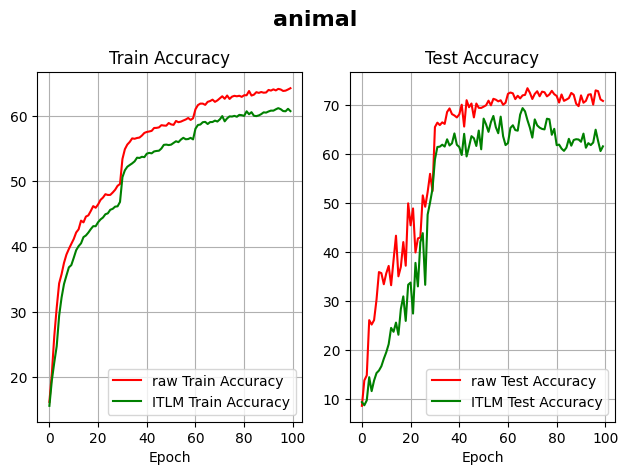

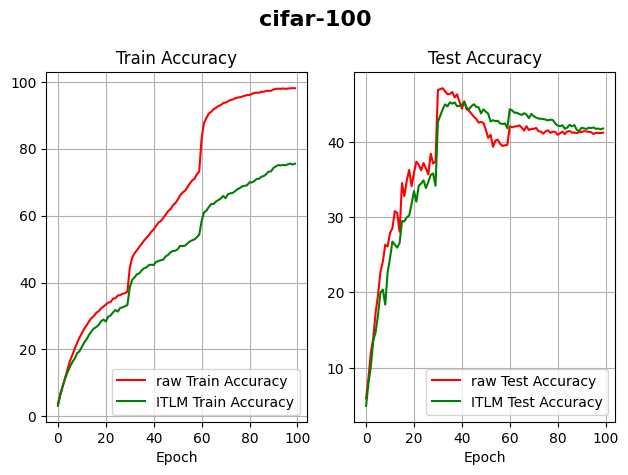

In [18]:
"""
干净数据集上训练与测试精度于严重噪声数据集上训练测试效果对比
在测试集上都达到拟合，带有噪声的数据拟合效果更差一下
在clean data上进行测试后发现，噪声样本训练出来的效果较差
"""
comp_plot_log_pic(raw_animal_noisy_label, ITLM_animal_noisy_label, 'animal')
comp_plot_log_pic(raw_noisy_label, ITLM_noisy_label, 'cifar-100')

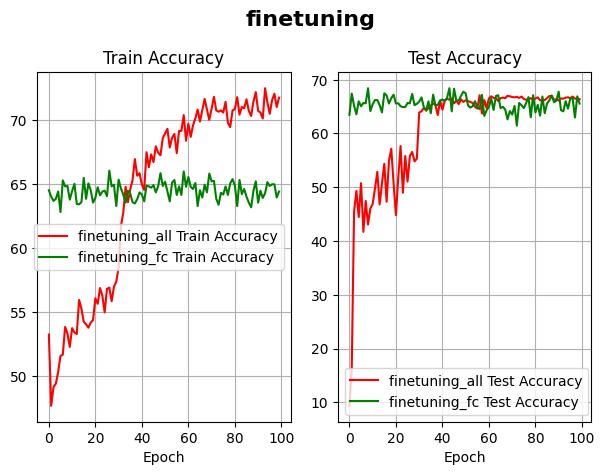

In [25]:
comp_plot_log_pic(resnet34_animal_raw_finetuning_all,resnet34_animal_raw_finetuning_fc, 'finetuning','finetuning_all','finetuning_fc')

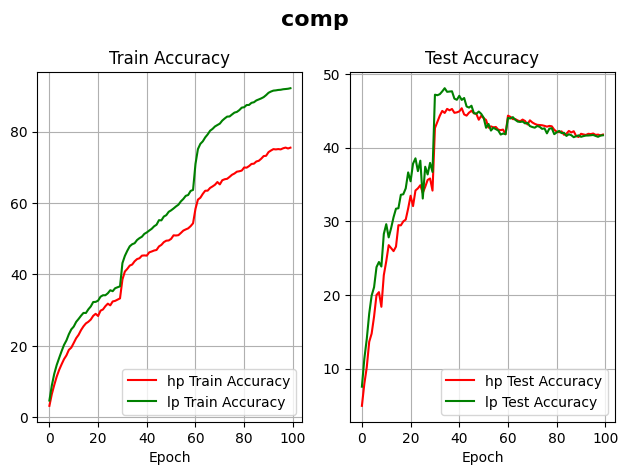

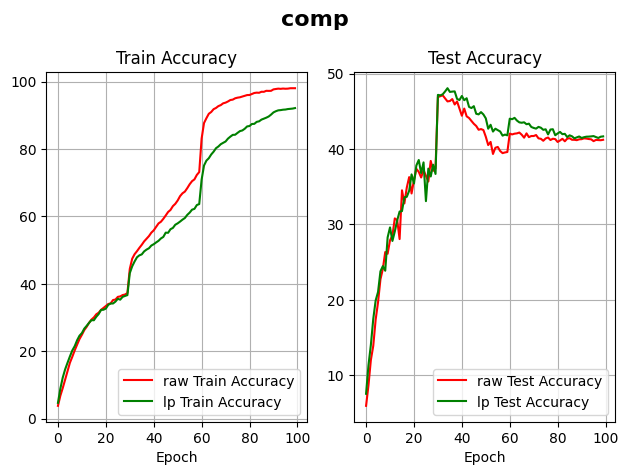

In [28]:
comp_plot_log_pic(ITLM_noisy_label_hp,ITLM_noisy_label_lp, 'comp','hp','lp')
comp_plot_log_pic(raw_noisy_label,ITLM_noisy_label_lp, 'comp','raw','lp')